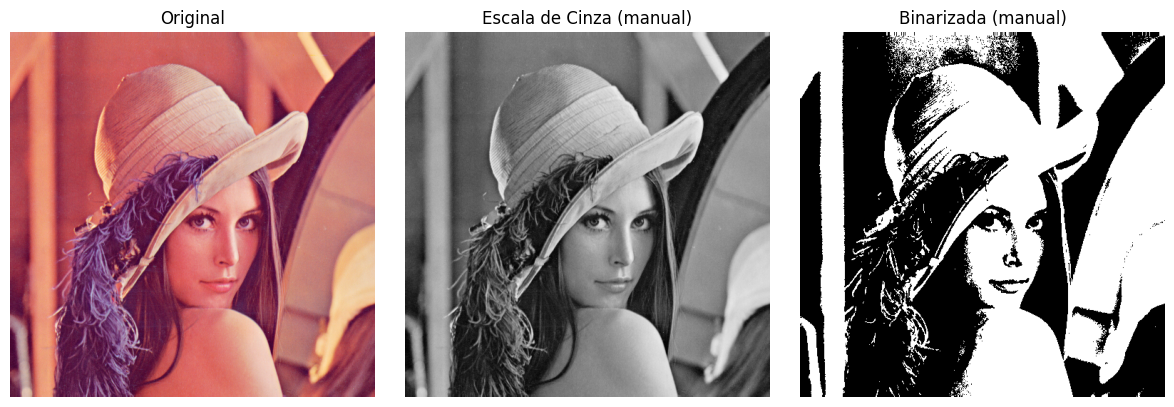

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 1. Carregar a imagem
img = Image.open('Lenna.png')  # Substitua pelo caminho da sua imagem
img = img.convert('RGB')  # Garante que seja RGB
pixels = np.array(img)   # Converte para array NumPy: shape (altura, largura, 3)

# 2. Converter manualmente para escala de cinza
def rgb_to_grayscale_manual(rgb_image):
    # Cria um array vazio para os valores em cinza
    gray = np.zeros((rgb_image.shape[0], rgb_image.shape[1]), dtype=np.uint8)

    # Aplica a fórmula de luminância ITU-R BT.601 pixel a pixel
    for i in range(rgb_image.shape[0]):
        for j in range(rgb_image.shape[1]):
            r, g, b = rgb_image[i, j]
            # Fórmula: Y = 0.299*R + 0.587*G + 0.114*B
            gray_value = int(0.299 * r + 0.587 * g + 0.114 * b)
            gray[i, j] = np.clip(gray_value, 0, 255)  # Garante estar no intervalo [0,255]
    return gray

# 3. Converter manualmente para binária (preto = 0, branco = 255)
def grayscale_to_binary_manual(gray_image, threshold=128):
    binary = np.zeros_like(gray_image, dtype=np.uint8)
    for i in range(gray_image.shape[0]):
        for j in range(gray_image.shape[1]):
            binary[i, j] = 255 if gray_image[i, j] >= threshold else 0
    return binary

# Aplicar as transformações
gray_img = rgb_to_grayscale_manual(pixels)
binary_img = grayscale_to_binary_manual(gray_img, threshold=128)

# 4. Visualizar os resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(pixels)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_img, cmap='gray')
plt.title("Escala de Cinza (manual)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(binary_img, cmap='gray')
plt.title("Binarizada (manual)")
plt.axis('off')

plt.tight_layout()
plt.show()